In [64]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

In [65]:
data_dumper.dump_data(tickers=["NEARUSDT"])

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download: 0files [00:00, ?files/s]

daily files to download: 0files [00:00, ?files/s]

In [66]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [67]:
col = [
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Quote asset volume"]
dataset = df.loc[:, col].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=col)
dataset

,Open,High,Low,Close,Volume,Quote asset volume
0,1.3000,1.8800,1.3000,1.3760,1429560.44,2.313165e+06
1,1.3759,1.4000,1.1111,1.2493,987505.68,1.205528e+06
2,1.2489,1.3593,1.1660,1.2552,549711.33,6.942747e+05
3,1.2499,1.2500,1.1359,1.1742,343258.80,4.081314e+05
4,1.1754,1.2752,1.1753,1.2300,243382.88,2.965310e+05
...,...,...,...,...,...,...
1468511,1.3710,1.3710,1.3690,1.3690,5932.20,8.131457e+03
1468512,1.3690,1.3690,1.3690,1.3690,81.30,1.112997e+02
1468513,1.3690,1.3700,1.3690,1.3690,1278.00,1.749664e+03
1468514,1.3690,1.3700,1.3690,1.3700,468.60,6.415331e+02


In [68]:
difference_dataset = dataset.diff().dropna().reset_index(drop=True)
difference_dataset[-256:]

,Open,High,Low,Close,Volume,Quote asset volume
1468259,0.000,0.001,0.000,0.001,1604.0,2205.4804
1468260,0.000,0.000,-0.002,-0.003,1699.4,2332.7910
1468261,-0.001,-0.001,0.001,0.002,-1455.5,-1999.6170
1468262,0.001,0.000,0.000,-0.001,-1628.7,-2237.6054
1468263,-0.001,-0.001,0.000,0.000,-178.5,-245.1770
...,...,...,...,...,...,...
1468510,0.000,0.000,-0.002,-0.002,5365.1,7353.9632
1468511,-0.002,-0.002,0.000,0.000,-5850.9,-8020.1576
1468512,0.000,0.001,0.000,0.000,1196.7,1638.3638
1468513,0.000,0.000,0.000,0.001,-809.4,-1108.1304


<Axes: xlabel='time'>

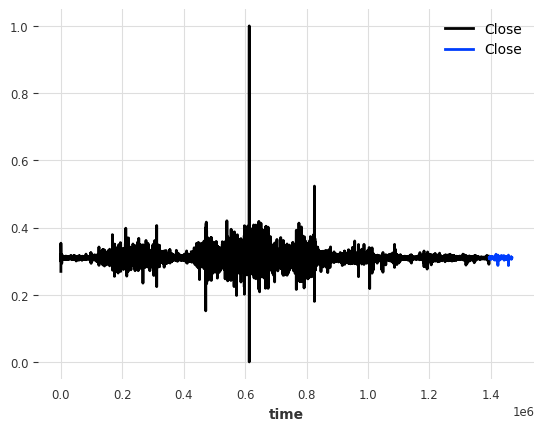

In [69]:
import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from darts.models import RNNModel, TFTModel
from darts.metrics import mape, mase
from darts.utils.likelihood_models import GaussianLikelihood

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(difference_dataset)

abslog = InvertibleMapper(fn=lambda x: np.sign(x) * np.log1p(np.abs(x)),
                          inverse_fn=lambda x: np.sign(x) * (np.exp(np.abs(x)) - 1))
scaler = Scaler()
pipeline = Pipeline([abslog, scaler])

target_series = pipeline.fit_transform(target_series)

target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [70]:
SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=32,
#     n_rnn_layers=4,
#     dropout=0.2,
#     batch_size=128,
#     n_epochs=10,
#     optimizer_kwargs={"lr": 1e-3},
#     random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     likelihood=GaussianLikelihood(),
# )

my_model = TFTModel(
    input_chunk_length=SEQUENCE_LENGTH,
    output_chunk_length=PREDICTION_LENGTH,
    hidden_size=128,
    lstm_layers=2,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=128,
    n_epochs=300,
    add_relative_index=True,
    add_encoders=None,
    random_state=42,
)

my_model.fit(target_train, val_series=target_val, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

TFTModel(hidden_size=128, lstm_layers=2, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=128, output_chunk_length=32, batch_size=128, n_epochs=300, add_encoders=None, random_state=42)

In [71]:
average_error = my_model.backtest(
    target_val,
    forecast_horizon=PREDICTION_LENGTH,
    # metric=mase,
    verbose=False,
    retrain=False,
    num_samples=8,
    start=0.8,
    # stride=5,
)

print("Average error (MAPE) over validation forecasts: %.2f" % average_error)

Average error (MAPE) over validation forecasts: 20.25


Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

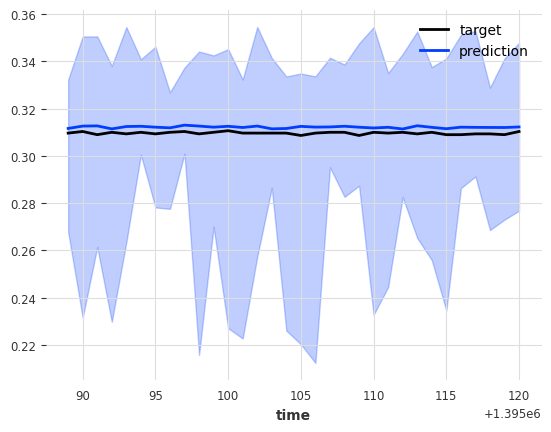

In [78]:
predict_X = target_train[-SEQUENCE_LENGTH:]
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X, num_samples=32)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [73]:
def inverse_diff(original_start, x):
    x = x.to_numpy()
    reversed_array = np.zeros_like(x)
    reversed_array[0] = original_start + x[0]
    for i in range(1, x.shape[0]):
        reversed_array[i] = reversed_array[i - 1] + x[i]
    return reversed_array


original_start = dataset.iloc[predict_X[-1].time_index].to_numpy()

inverted_pred = pipeline.inverse_transform(pred)
inverted_pred = inverted_pred.mean().pd_dataframe()
inverted_pred[:] = inverse_diff(original_start, inverted_pred)
inverted_pred

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
1395089,1.180007,1.199370,1.197364,1.189352,12433.134015,5736.134471
1395090,1.179963,1.198188,1.182589,1.196012,11946.098272,7598.894034
1395091,1.161694,1.200902,1.175577,1.189520,11075.248030,-6572.555529
1395092,1.154023,1.205453,1.173588,1.184760,12022.790217,-11118.593906
1395093,1.153283,1.206650,1.179487,1.196755,13239.078666,-14536.526135
1395094,1.124557,1.210359,1.183227,1.195803,11195.624421,-11460.850510
1395095,1.092788,1.217289,1.179683,1.183594,9940.860750,-9208.143214
1395096,1.072969,1.216777,1.186267,1.174479,12558.494765,-12758.988755
1395097,1.079625,1.220843,1.184362,1.169966,10052.857264,129.797275


In [74]:
inverted_target = pipeline.inverse_transform(target_val).pd_dataframe()
inverted_target[:] = inverse_diff(original_start, inverted_target)
inverted_target = inverted_target[:PREDICTION_LENGTH]
inverted_target

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
1395089,1.198,1.197,1.194,1.195,9524.4,11381.4930
1395090,1.199,1.199,1.194,1.197,30679.8,36720.6211
1395091,1.199,1.198,1.195,1.195,10954.4,13094.4357
1395092,1.198,1.198,1.195,1.196,9075.1,10843.6993
1395093,1.199,1.198,1.195,1.195,8970.6,10718.7350
1395094,1.199,1.198,1.196,1.196,10359.0,12382.0862
1395095,1.199,1.198,1.195,1.195,8885.1,10616.2686
1395096,1.199,1.198,1.195,1.196,9291.2,11102.3755
1395097,1.199,1.200,1.196,1.198,22067.7,26417.8810


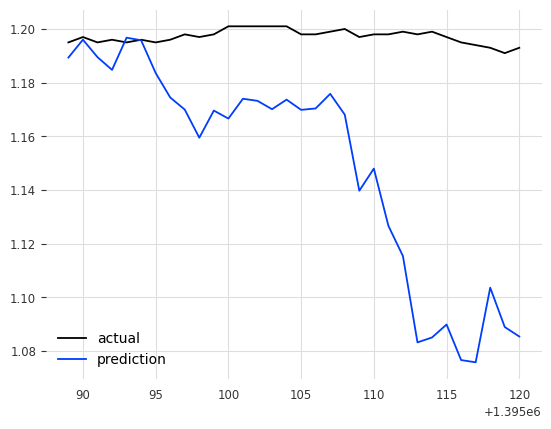

In [75]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
columns = ["Open", "High", "Low", "Close", "Volume", "Quote asset volume"]
candlesticks_df = pd.DataFrame(inverted_target, columns=columns)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=columns)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting
# fig, ax = plt.subplots(figsize=(15, 10))

# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()